## Laboratory 3: Mixed Methods or Semi- Supervised Learning

### Part 1 - practice running a k-Means analysis

In [58]:
import pandas as pd 
input_file = "/Users/hit028/Desktop/530/Lab3/Wholesale_customers_data.csv"
wholesale = pd.read_csv(input_file)
wholesale.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [59]:
wholesale.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

In [71]:
# Let's see what is off the table.

for i in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    print('Maximum of', i, 'is', wholesale[i].max(), 'while mean value is', wholesale[i].mean())

Maximum of Fresh is 112151 while mean value is 12000.297727272728
Maximum of Milk is 73498 while mean value is 5796.265909090909
Maximum of Grocery is 92780 while mean value is 7951.277272727273
Maximum of Frozen is 60869 while mean value is 3071.931818181818
Maximum of Detergents_Paper is 40827 while mean value is 2881.4931818181817
Maximum of Delicassen is 47943 while mean value is 1524.8704545454545


In [61]:
# What if we fit a normal distribution to one of the variables?

import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

mu = wholesale['Fresh'].mean()
sigma = wholesale['Fresh'].std()
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)

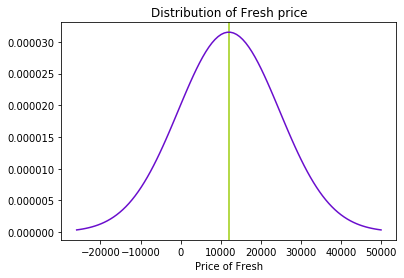

In [218]:
# See one of the variables more closely and analyze the possible outliers.
import matplotlib.pyplot as plt 
from scipy.stats import norm 
mu = wholesale['Fresh'].mean() 
sigma = wholesale['Fresh'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
plt.axvline(x = mu, color = "#9dcd0e") 
plt.plot(x, norm.pdf(x,mu,sigma), c = "#6a0ecd") 
plt.title('Distribution of Fresh price') 
plt.xlabel('Price of Fresh') 
plt.show()

In [141]:
# Drop columns that are more than 3 times of std

import numpy as np 
from scipy import stats

In [142]:
wholesale_new = wholesale[(np.abs(stats.zscore(wholesale)) < 3).all(axis=1)] 
wholesale_new = wholesale_new.drop(['Channel', 'Region'], axis= 1) 
wholesale_new.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


In [65]:
# How many data points were dropped?

print('Number of dropped instances=', wholesale.shape[0]- wholesale_new.shape[0])

Number of dropped instances= 26


#### Design the model

#### K means model

In [143]:
# Implement Kmeans 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=76964057).fit(wholesale_new)

In [144]:
# Centroids 
kmeans.cluster_centers_

array([[16470.87037037,  3026.49074074,  4264.74074074,  3217.30555556,
          996.55555556,  1319.75925926],
       [ 5502.33333333, 13328.47619048, 21524.30952381,  1691.71428571,
         9145.95238095,  1682.30952381],
       [ 5013.3006993 ,  2270.53146853,  2742.87412587,  2597.83916084,
          643.02797203,   834.55244755],
       [32641.95238095,  4895.5       ,  5538.04761905,  3842.69047619,
          944.95238095,  1639.28571429],
       [ 4263.94936709,  7595.20253165, 10526.2278481 ,  1319.65822785,
         4546.65822785,  1406.64556962]])

In [145]:
pd.DataFrame(data=kmeans.cluster_centers_, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16470.870370,3026.490741,4264.740741,3217.305556,996.555556,1319.759259
1,5502.333333,13328.476190,21524.309524,1691.714286,9145.952381,1682.309524
2,5013.300699,2270.531469,2742.874126,2597.839161,643.027972,834.552448
3,32641.952381,4895.500000,5538.047619,3842.690476,944.952381,1639.285714
4,4263.949367,7595.202532,10526.227848,1319.658228,4546.658228,1406.645570


Cluster 0 looks to be a heavy Fresh and above average Grocery but low Detergents_paper.
Cluster 1 is dominant in the Grocery category.

Q1 : Given this is an imperfect real-world, you need to determine what you believe is the best value for “k” and write-up this portion of your lab report. 

Answer : K can be determined by Empirical method, but it is more suitable for us to experiment with Elbow method in the real world, which let us use the turning point in the curve of sum of within cluster variance w.r.t the numbers of clusters.

In [146]:
# Q2 : How many points do you see in each cluster? 

# Answer : Cluster 0 = 108, cluster 1 = 42, cluster 2 = 143 cluster 3 = 42, clluster 4 = 79.

pd.Series(kmeans.labels_).value_counts()

2    143
0    108
4     79
3     42
1     42
dtype: int64

At k=  2 The percentage of change in SSE is  38.059747884949296 %
At k=  3 The percentage of change in SSE is  36.79140977278884 %
At k=  4 The percentage of change in SSE is  19.949152060286597 %
At k=  5 The percentage of change in SSE is  15.627091486585684 %
At k=  6 The percentage of change in SSE is  11.357482276048332 %
At k=  7 The percentage of change in SSE is  8.73140249666423 %
At k=  8 The percentage of change in SSE is  6.658044624473278 %
At k=  9 The percentage of change in SSE is  7.05377812493527 %
At k=  10 The percentage of change in SSE is  7.024849824478098 %
At k=  11 The percentage of change in SSE is  3.9307767253465533 %
At k=  12 The percentage of change in SSE is  8.315284281709383 %
At k=  13 The percentage of change in SSE is  4.709693744106548 %
At k=  14 The percentage of change in SSE is  3.0495083388263735 %
At k=  15 The percentage of change in SSE is  5.8715363282234705 %
At k=  16 The percentage of change in SSE is  3.9429835097186685 %
At k=  17 Th

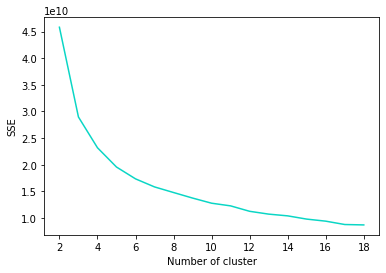

In [234]:
# Code to generate elbow graph
sse = {}
last_sse = 73984012841.4855 
for k in range(2, 19):
    kmeans = KMeans(n_clusters=k, random_state=76964057).fit(wholesale_new) 
    wholesale_new["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ', change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), c = "#0ad6c5") 
plt.xlabel("Number of cluster")
plt.ylabel("SSE") 
plt.show()

### Part 2 : Wine Data - write a brief description of the k- Means analysis conducted and the results of the k-Means analysis

In [73]:
import pandas as pd 
input_file = "/Users/hit028/Desktop/530/Lab3/wine.csv"
wine = pd.read_csv(input_file)
wine.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Design K mean model for wine dataset

At k=  2 The percentage of change in SSE is  74.15488674866565 %
At k=  3 The percentage of change in SSE is  47.85867914958282 %
At k=  4 The percentage of change in SSE is  43.762903930920984 %
At k=  5 The percentage of change in SSE is  31.259697899974825 %
At k=  6 The percentage of change in SSE is  29.36040331823771 %
At k=  7 The percentage of change in SSE is  36.286611631557804 %
At k=  8 The percentage of change in SSE is  20.928445203804678 %
At k=  9 The percentage of change in SSE is  16.852815885438403 %
At k=  10 The percentage of change in SSE is  19.609525230112702 %
At k=  11 The percentage of change in SSE is  12.36611453486062 %
At k=  12 The percentage of change in SSE is  15.614343360527824 %
At k=  13 The percentage of change in SSE is  12.103750623240348 %
At k=  14 The percentage of change in SSE is  13.680026635956386 %


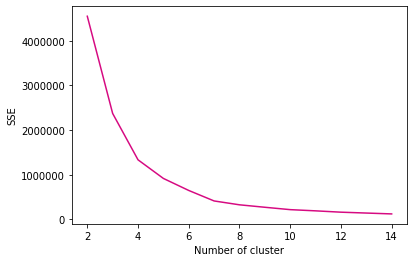

In [236]:
# Code to generate elbow graph 

sse = {} 
last_sse = 17592402.70373319 
for k in range(2, 15): 
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(wine) 
    wine["clusters"] = kmeans.labels_ 
    #print(data["clusters"]) 
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center 
    change_per = (last_sse-kmeans.inertia_)/last_sse*100 
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%')
    last_sse = kmeans.inertia_ 
plt.figure() 
plt.plot(list(sse.keys()), list(sse.values()), c = "#d60a81") 
plt.xlabel("Number of cluster") 
plt.ylabel("SSE") 
plt.show()

#### Design K mean model algorithm

In [149]:
# Design a model with best k=3 

kmeans = KMeans(n_clusters=3, random_state=1234).fit(wine) 
pd.Series(kmeans.labels_).value_counts()

1    69
2    62
0    47
dtype: int64

In [150]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

# Make a comparison between actual wine type and the predicted one
confusion_matrix(kmeans.labels_, wine['Wine']-1) 

array([[46,  1,  0],
       [ 0, 50, 19],
       [13, 20, 29]])

In [151]:
accuracy_score(kmeans.labels_, wine['Wine']-1)*100 

70.2247191011236

### Part 3 - Decision Tree for Wine dataset

In [174]:
# Label the data frame we have been using with the cluster labels

import numpy as np 
from sklearn.model_selection import train_test_split 
y3w = kmeans.labels_ 
X3w = wine.drop(['Wine'], axis=1) 
X3w_train, X3w_test, y3w_train, y3w_test = train_test_split(X3w, y3w, test_size=0.30, random_state=1234)

In [182]:
# Train the decision tree as you did in lab 1.

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
modelWine = tree.DecisionTreeClassifier() 
modelWine = modelWine.fit(X3w_train, y3w_train)

In [183]:
from graphviz import Source
from IPython.display import display
from IPython.display import SVG

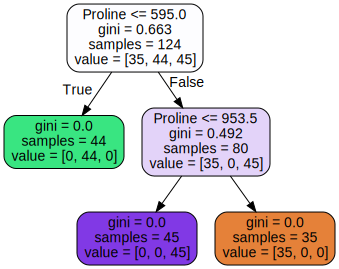

In [184]:
dot_data = tree.export_graphviz(modelWine, out_file=None, max_depth=2, feature_names=list(X3w.columns.values), filled=True, rounded=True)
graphWine = graphviz.Source(dot_data) 
graphWine

### Part 4 - analyze the breast cancer dataseet

Q3 - Load the dataset of breast cancer. 
Do the preliminary analysis and implement a KNN (K- nearest neighbors) model for this dataset and don’t forget that whenever it is required you should use: set.seed(12345). 
You can use following command and don’t forget to scale the data prior to design the model.
Use 80% of data for training and report the accuracy.

In [72]:
import pandas as pd 
input_file = "/Users/hit028/Desktop/530/Lab3/wisc_bc_data.csv"
bc = pd.read_csv(input_file)
bc.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [104]:
target3 = bc['diagnosis']
target3.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
number = LabelEncoder()
yBC = number.fit_transform(bc["diagnosis"].astype('str'))
XBC = scale(bc.drop(['id', 'diagnosis'], axis = 1))
XBC_train, XBC_test, yBC_train, yBC_test = train_test_split(XBC, yBC, test_size=0.20, random_state=12345)

Scaling is important, unlless if it's either "Decision Tree method" or "Random Forest method".

In [189]:
# k is the square root of training data

# Method 1 by using "neighbors"

from sklearn.neighbors import KNeighborsClassifier 
neighBC = KNeighborsClassifier(n_neighbors = 21) 
neighBC.fit(XBC_train, yBC_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [193]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predictBC = neighBC.predict(XBC_test) 
print(confusion_matrix(yBC_test, y_predictBC))

[[76  0]
 [ 3 35]]


In [195]:
print("accuracy = ", accuracy_score(yBC_test, y_predictBC)*100)

accuracy =  97.36842105263158


In [191]:
# Method 2 by using svm polynomial kernel

from sklearn import svm
clfBC = svm.SVC(kernel = 'poly', degree=3)
clfBC.fit(XBC_train, yBC_train)

/Users/hit028/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [192]:
from sklearn.metrics import accuracy_score
y_predictBC2 = clfBC.predict(XBC_test)
accuracy_score(yBC_test, y_predictBC2)*100

92.10526315789474

Q4 - Now let’s get back to our problem of news popularity and see if we can apply KNN (K- nearest neighbors) to improve the accuracy of the model. Use the same strategy of training and testing that we did on first 2 labs, and don’t forget that whenever it is required you should use: set.seed(12345).

In [1]:
import pandas as pd 
input_file4 = "/Users/hit028/Desktop/530/530 Lab1/OnlineNewsPopularityP.csv"
news = pd.read_csv(input_file4)
news.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [226]:
popular = news.shares >= 1400
unpopular = news.shares < 1400 
news.loc[popular,'shares'] = 1 
news.loc[unpopular,'shares'] = 0

In [227]:
target4 = news['shares']
target4.value_counts()

1    21154
0    18490
Name: shares, dtype: int64

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
number = LabelEncoder()
yNEWS = number.fit_transform(news["shares"].astype('str'))
XNEWS = scale(news.drop(['url', 'shares'], axis = 1))
XNEWS_train, XNEWS_test, yNEWS_train, yNEWS_test = train_test_split(XNEWS, yNEWS, test_size=0.30, random_state=12345)

In [231]:
from sklearn.neighbors import KNeighborsClassifier 
neighNEWS = KNeighborsClassifier(n_neighbors = 21) 
neighNEWS.fit(XNEWS_train, yNEWS_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [232]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predictNEWS = neighNEWS.predict(XNEWS_test) 
print(confusion_matrix(yNEWS_test, y_predictNEWS))

[[3492 1999]
 [2278 4125]]


In [233]:
print("accuracy = ", accuracy_score(yNEWS_test, y_predictNEWS)*100)

accuracy =  64.0406927862788


**Summary**

From the previous analysis in Lab2, Naïve Bayes Classifier resulted the accuaracy score of 50% and SVM provided the accuracy scores ranged between 57-60%, therefore, KNN here gave us the highest accuracy score og 64% compare to other methods we have experimented. I can conclude that KNN method provides imroved accuracy score from the previous analysis.